In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [46]:
df=pd.read_csv('heart-disease.csv')


In [47]:
# view number of records in data
df.shape

(303, 14)

# Data preparation 

In [48]:
# check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [50]:
df.duplicated().sum()

1

In [52]:
df.drop_duplicates(inplace=True)

#  Feature Engineering

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)


In [55]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
df['sex']=df['sex'].map({0:'female',1:'male'})

In [57]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

In [61]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


In [62]:
df.to_csv('processed heart disease data')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           302 non-null    int64  
 1   sex                           302 non-null    object 
 2   chest_pain_type               302 non-null    object 
 3   resting_blood_pressure        302 non-null    int64  
 4   cholestoral                   302 non-null    int64  
 5   fasting_blood_sugar           302 non-null    object 
 6   resting_electrocardiographic  302 non-null    object 
 7   maximum_heart_rate            302 non-null    int64  
 8   exercise_induced_angina       302 non-null    object 
 9   ST_depression                 302 non-null    float64
 10  slope_peak_exercise_ST        302 non-null    object 
 11  number_of_major_vessels       302 non-null    int64  
 12  thal                          302 non-null    object 
 13  targe

In [64]:
df.describe()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [66]:
df.describe(include="O")

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


In [68]:
df.nunique()

age                              41
sex                               2
chest_pain_type                   4
resting_blood_pressure           49
cholestoral                     152
fasting_blood_sugar               2
resting_electrocardiographic      3
maximum_heart_rate               91
exercise_induced_angina           2
ST_depression                    40
slope_peak_exercise_ST            3
number_of_major_vessels           5
thal                              4
target                            2
dtype: int64

In [96]:
colNUM=[]
colCAT=[]
for i in df.columns:
    if(len(df[i].unique())>6):
        colNUM.append(i)
    else:
        colCAT.append(i)
        
dataCat=df[colCAT]
dataNUM=df[colNUM]
        

        


In [97]:
colCAT

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_electrocardiographic',
 'exercise_induced_angina',
 'slope_peak_exercise_ST',
 'number_of_major_vessels',
 'thal',
 'target']

In [98]:
colNUM.append('target')
dataNUM=df[colNUM]

sex


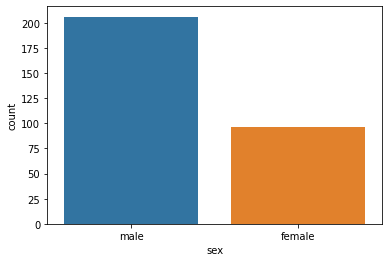

chest_pain_type


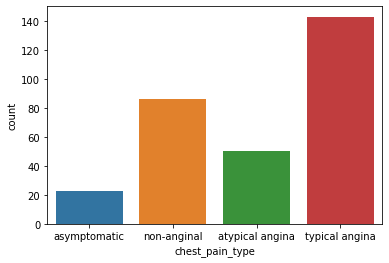

fasting_blood_sugar


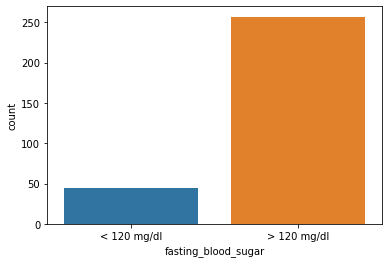

resting_electrocardiographic


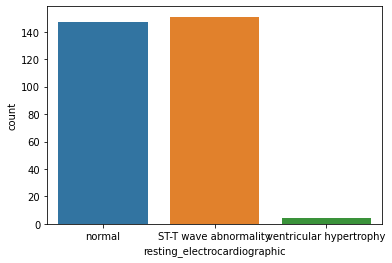

exercise_induced_angina


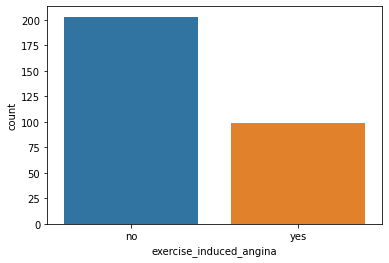

slope_peak_exercise_ST


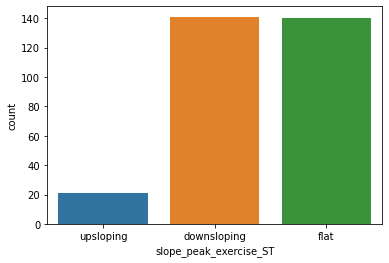

number_of_major_vessels


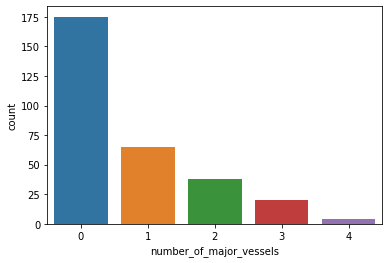

thal


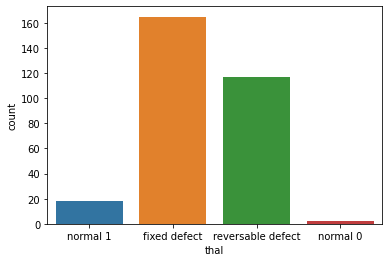

target


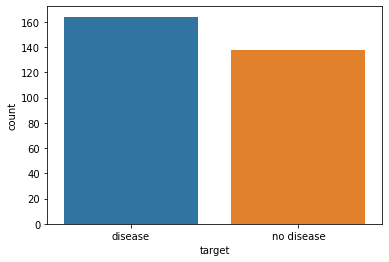

In [103]:
for i in colCAT:
    print(i)
    sns.countplot(x=i,data=dataCAT)
    plt.show()

In [104]:
# bivariante analysis
diseaseCAT=df[df['target']=='disease']
no_diseaseCAT=df[df['target']=='no disease']

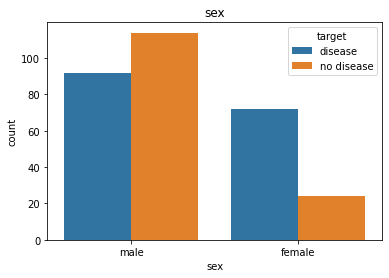

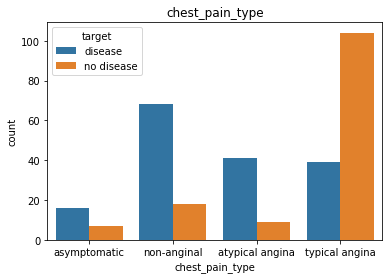

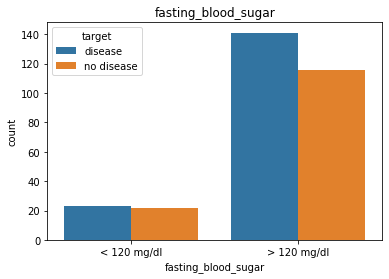

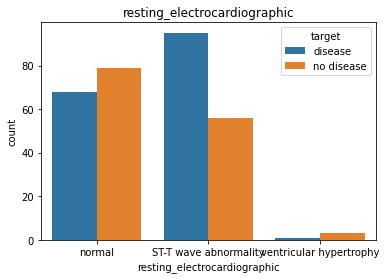

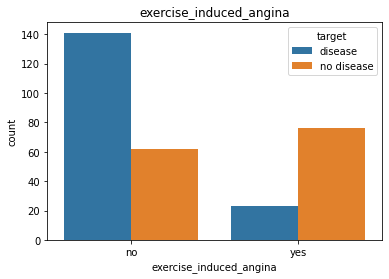

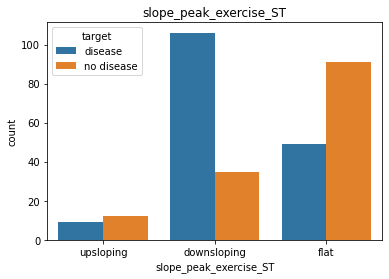

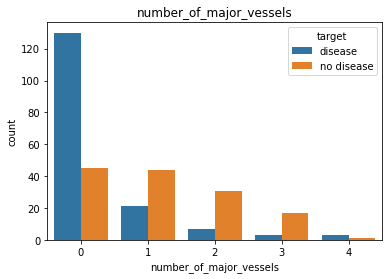

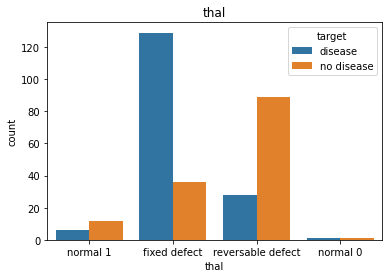

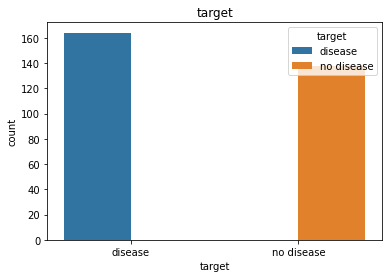

In [109]:
numberofsubplot=len(dataCAT.columns)
numberofcolumns=3
subplotnumber=1
for i in colCAT:

    plt.title(i)
    sns.countplot(x=i,data=dataCAT,hue='target')
    plt.show()
    

#   reading data

In [198]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [199]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))


--- NULL count ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1st DUPLICATE count:	1
2nd DUPLICATE count:	0


In [200]:
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


In [201]:

df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


In [202]:
df.to_csv('processed -data.csv')

In [203]:
print(df.info())         #  dataset size and types
print('\nData Shape:  {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           302 non-null    int64  
 1   sex                           302 non-null    object 
 2   chest_pain_type               302 non-null    object 
 3   resting_blood_pressure        302 non-null    int64  
 4   cholestoral                   302 non-null    int64  
 5   fasting_blood_sugar           302 non-null    object 
 6   resting_electrocardiographic  302 non-null    object 
 7   maximum_heart_rate            302 non-null    int64  
 8   exercise_induced_angina       302 non-null    object 
 9   ST_depression                 302 non-null    float64
 10  slope_peak_exercise_ST        302 non-null    object 
 11  number_of_major_vessels       302 non-null    int64  
 12  thal                          302 non-null    object 
 13  targe

In [204]:
df.describe()  

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [205]:
df.describe(include=['O'])  

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


In [206]:
df.nunique()

age                              41
sex                               2
chest_pain_type                   4
resting_blood_pressure           49
cholestoral                     152
fasting_blood_sugar               2
resting_electrocardiographic      3
maximum_heart_rate               91
exercise_induced_angina           2
ST_depression                    40
slope_peak_exercise_ST            3
number_of_major_vessels           5
thal                              4
target                            2
dtype: int64

In [207]:
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_peak_exercise_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


In [208]:
dataCAT.head()

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,male,asymptomatic,< 120 mg/dl,normal,no,upsloping,0,normal 1,disease
1,male,non-anginal,> 120 mg/dl,ST-T wave abnormality,no,upsloping,0,fixed defect,disease
2,female,atypical angina,> 120 mg/dl,normal,no,downsloping,0,fixed defect,disease
3,male,atypical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,0,fixed defect,disease
4,female,typical angina,> 120 mg/dl,ST-T wave abnormality,yes,downsloping,0,fixed defect,disease


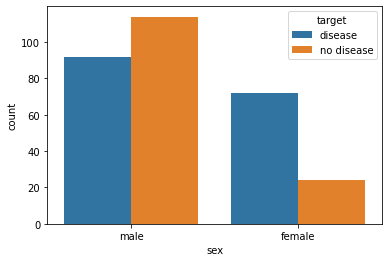

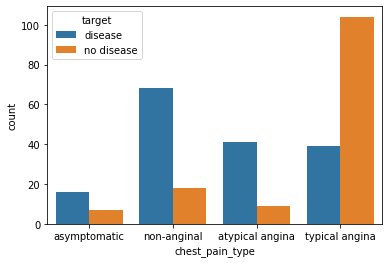

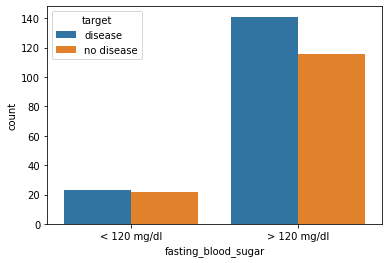

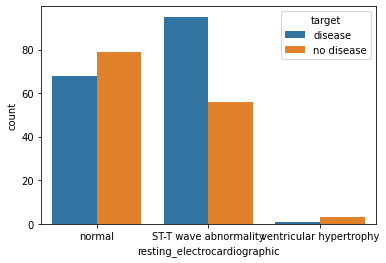

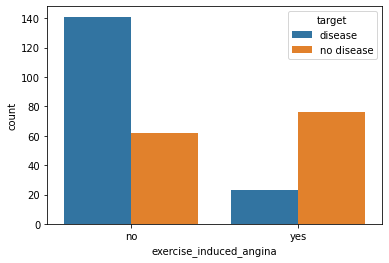

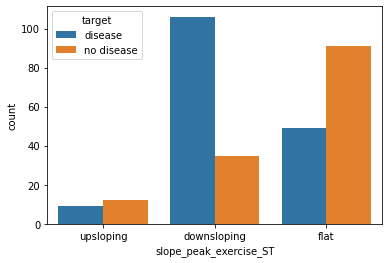

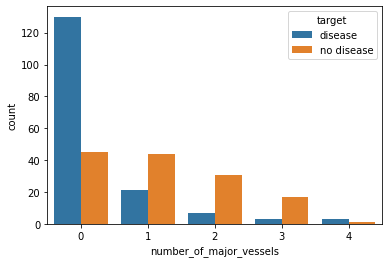

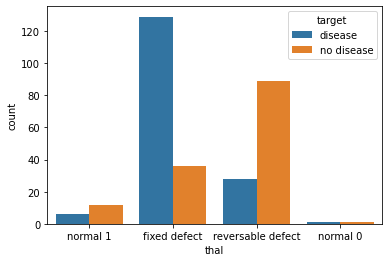

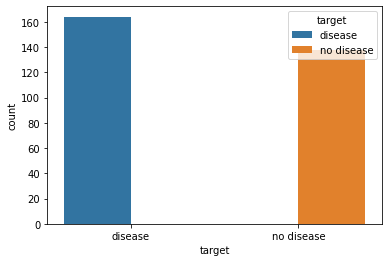

In [209]:
for i in colCAT:
    sns.countplot(x=i,data=dataCAT,hue='target')
    plt.show()

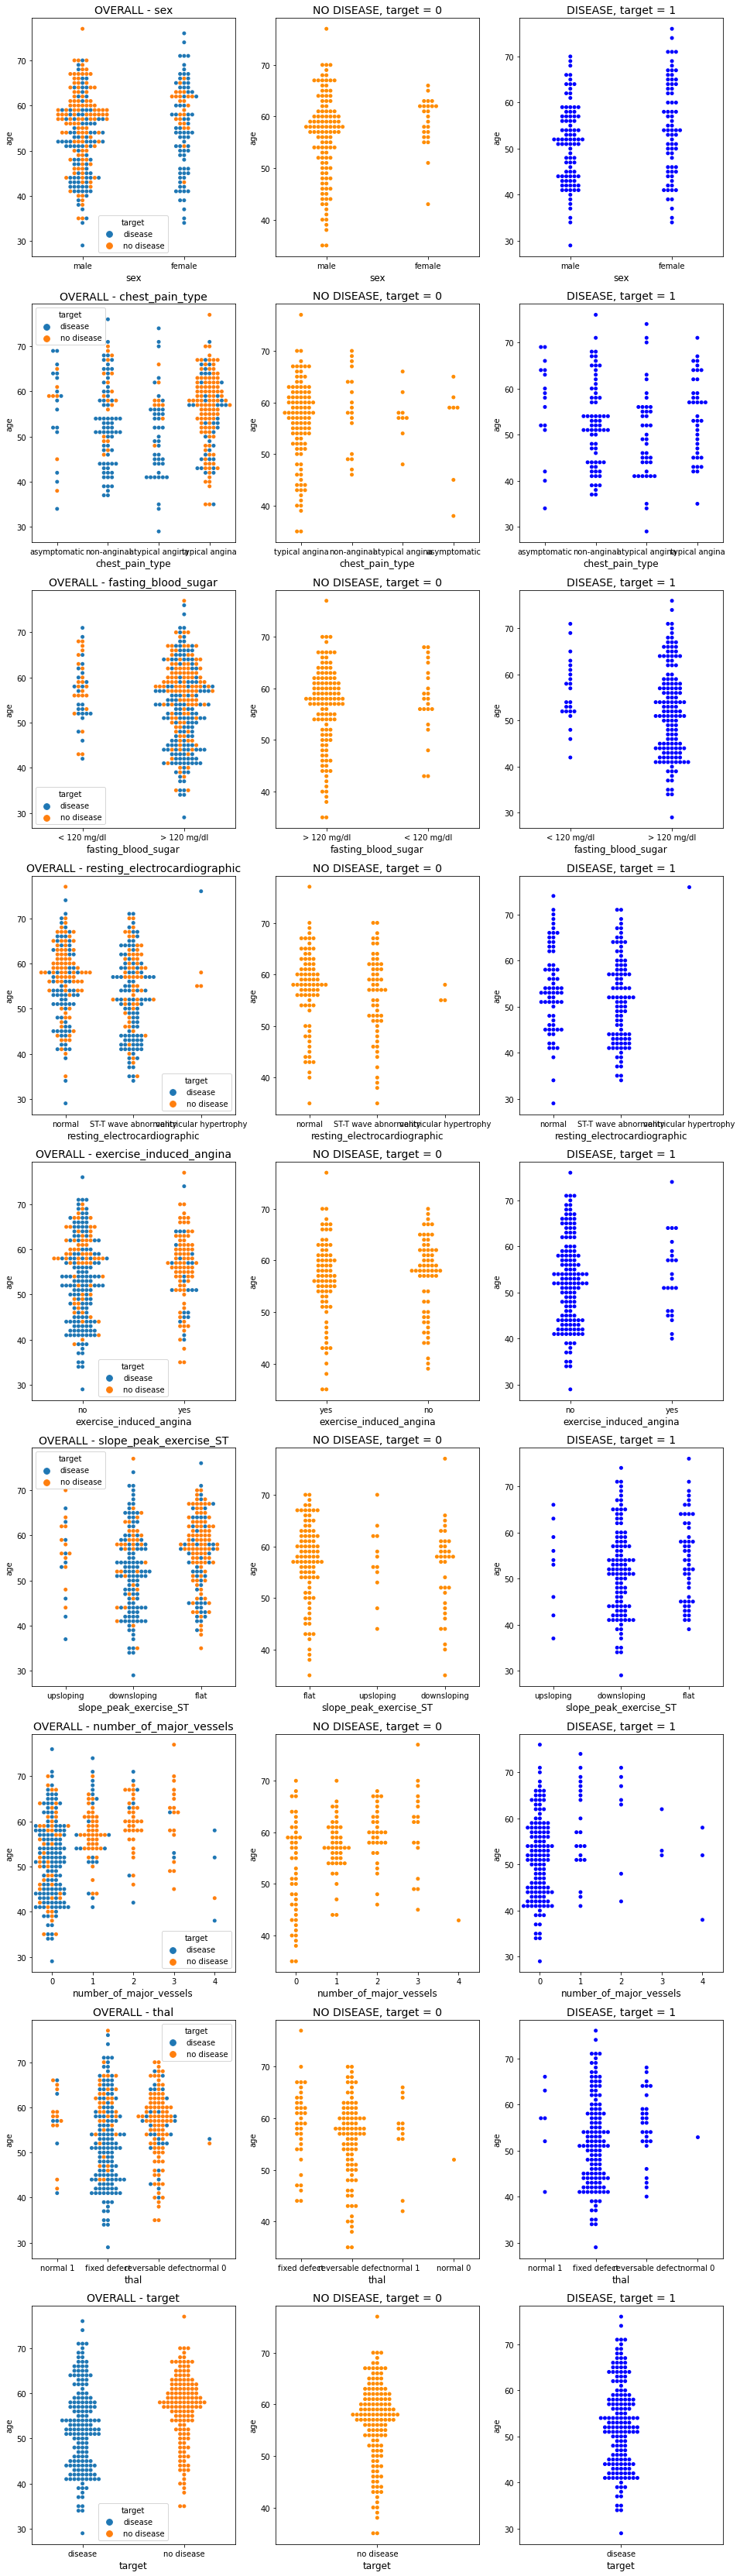

In [210]:
diseaseCAT    = df[(df['target'] == 'disease')]
no_diseaseCAT = df[(df['target'] == 'no disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,60))

for i in colCAT:
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.target)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_diseaseCAT, x=no_diseaseCAT[i],y=no_diseaseCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=diseaseCAT, x=diseaseCAT[i],y=diseaseCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()


In [12]:
dataNUM.head() 

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,63,145,233,150,2.3,disease
1,37,130,250,187,3.5,disease
2,41,130,204,172,1.4,disease
3,56,120,236,178,0.8,disease
4,57,120,354,163,0.6,disease


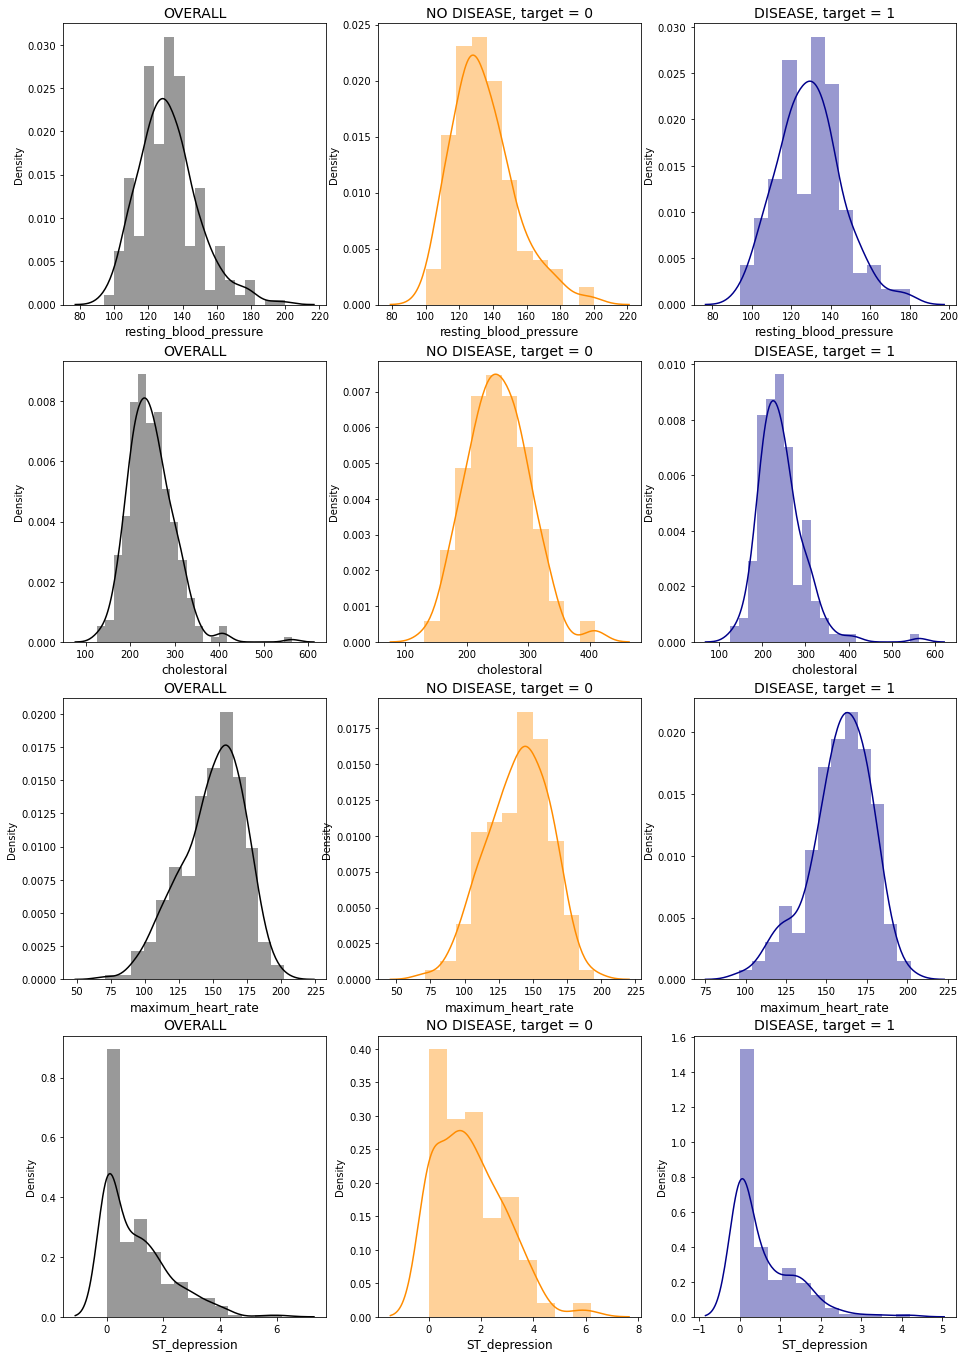

In [211]:
no_diseaseNUM = dataNUM[(df['target'] == 'no disease')]
diseaseNUM    = dataNUM[(df['target'] == 'disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)-1   #  x='age' in plots, drop column
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,30))

for i in dataNUM.columns.drop(["age","target"]):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_diseaseNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(diseaseNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

In [212]:
colCAT

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_electrocardiographic',
 'exercise_induced_angina',
 'slope_peak_exercise_ST',
 'number_of_major_vessels',
 'thal',
 'target']

In [213]:
# prepare data for machine learning model
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,63,145,233,150,2.3,1
1,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,37,130,250,187,3.5,1
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,41,130,204,172,1.4,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,57,120,354,163,0.6,1


In [214]:
df_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   sex_female                                            302 non-null    uint8  
 1   sex_male                                              302 non-null    uint8  
 2   chest_pain_type_asymptomatic                          302 non-null    uint8  
 3   chest_pain_type_atypical angina                       302 non-null    uint8  
 4   chest_pain_type_non-anginal                           302 non-null    uint8  
 5   chest_pain_type_typical angina                        302 non-null    uint8  
 6   fasting_blood_sugar_< 120 mg/dl                       302 non-null    uint8  
 7   fasting_blood_sugar_> 120 mg/dl                       302 non-null    uint8  
 8   resting_electrocardiographic_ST-T wave abnormality    302 no

In [215]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.70833333, 0.48113208, 0.24429224, 0.60305344, 0.37096774,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33962264, 0.28310502, 0.88549618, 0.56451613,
        1.        ]])

In [216]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1.0


<AxesSubplot:title={'center':'Heart Disease - CORRELATION, Overall'}>

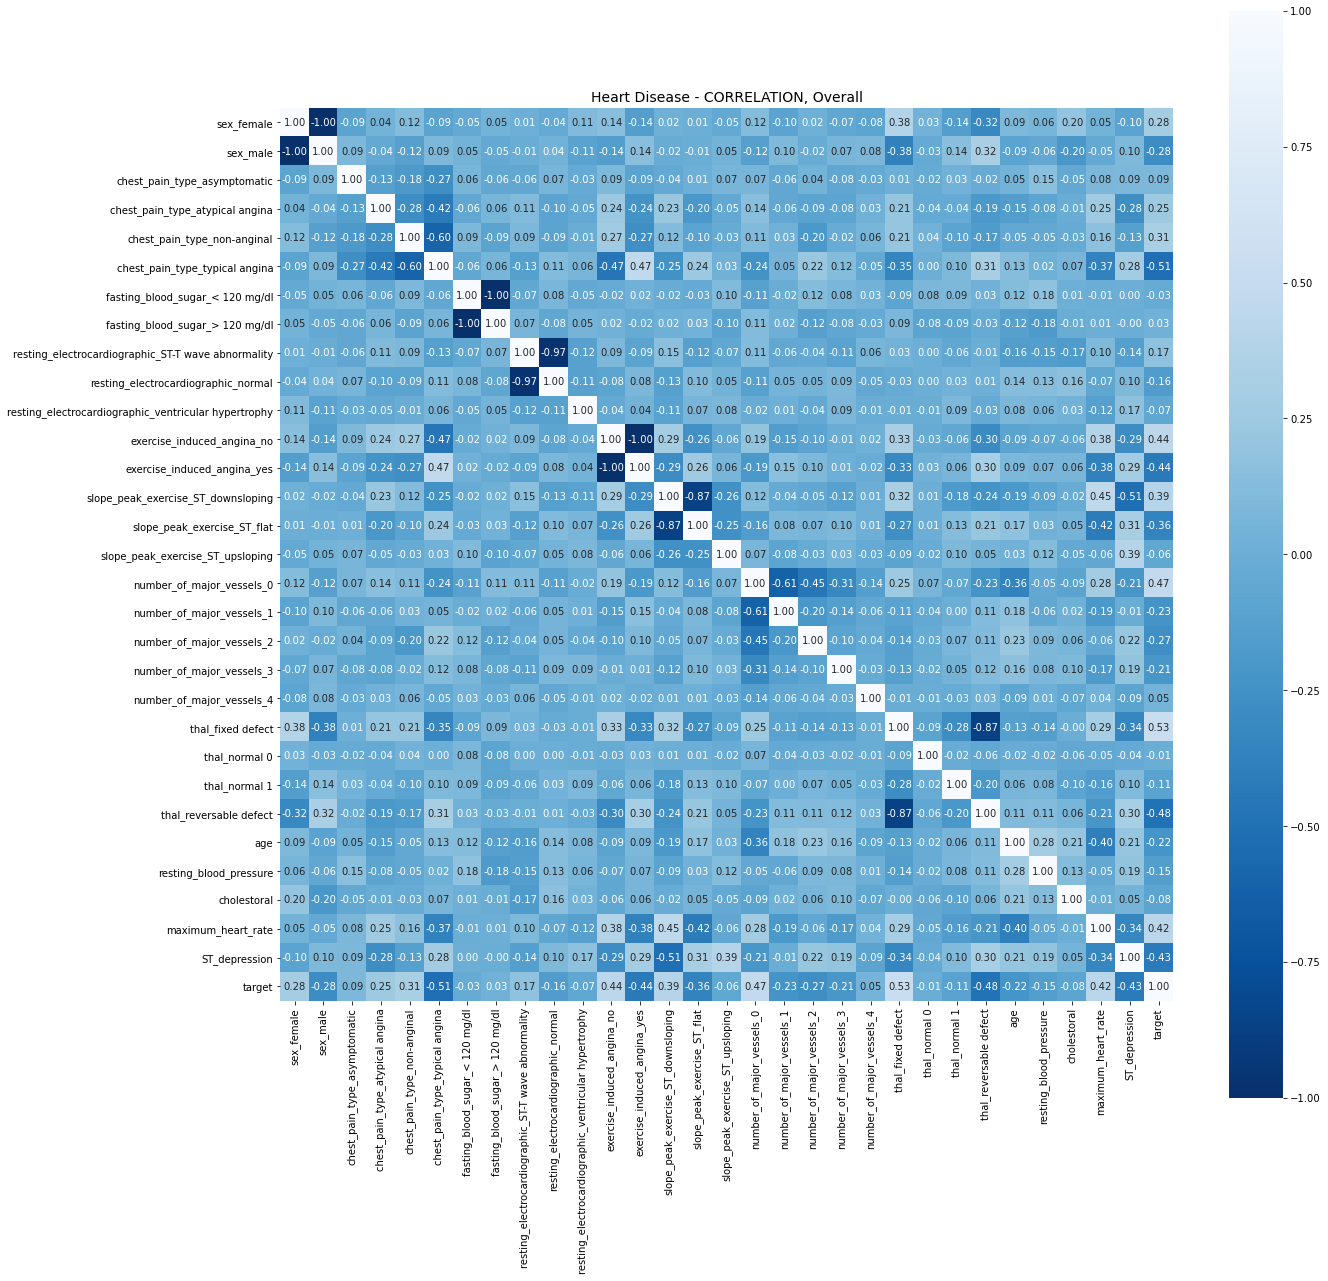

In [217]:
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

<AxesSubplot:title={'center':'Heart Disease - CORRELATION, Overall'}>

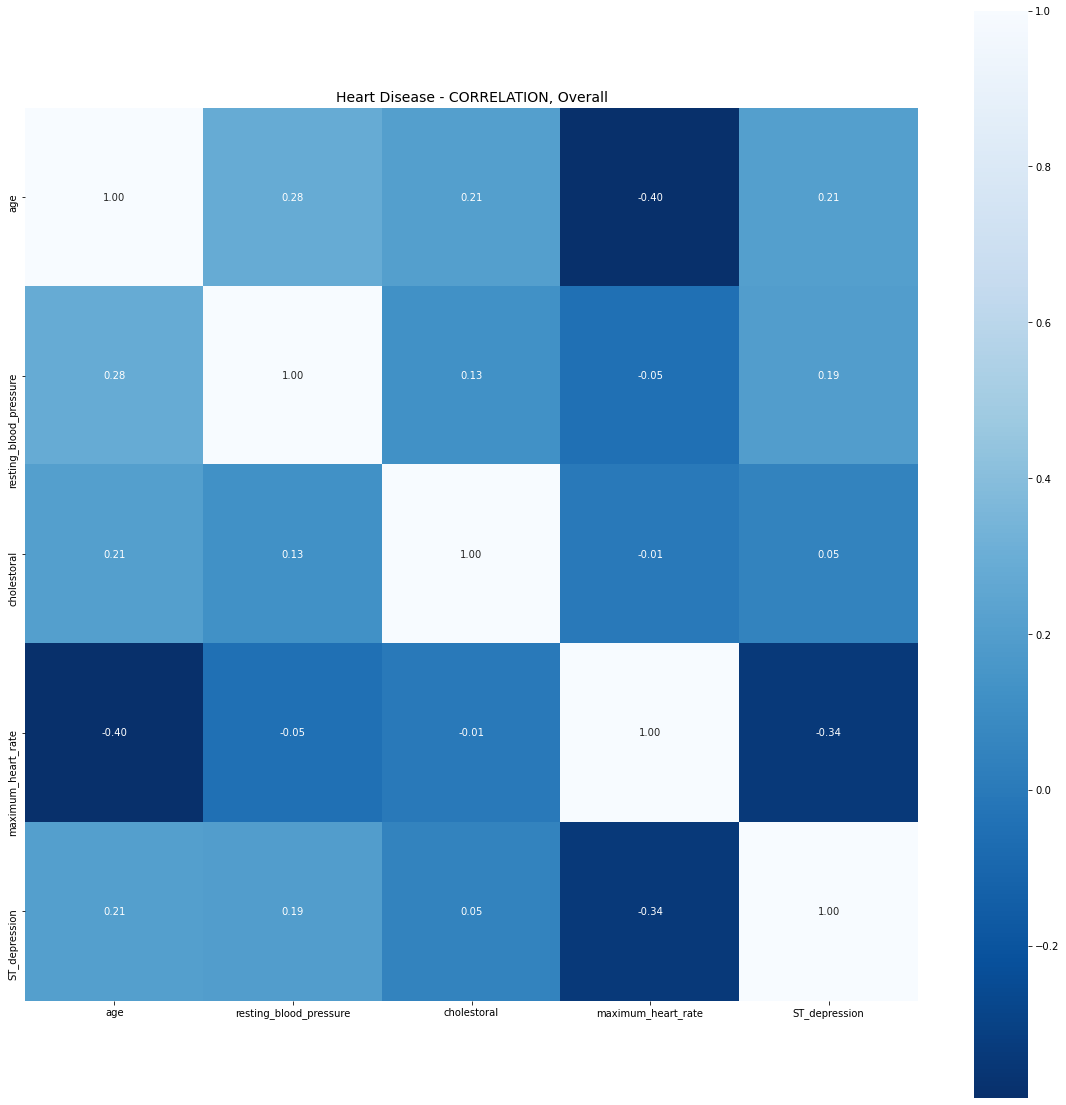

In [150]:
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

In [218]:
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])
corrALL.to_frame()

,target
thal_fixed defect,0.526030
number_of_major_vessels_0,0.470849
exercise_induced_angina_no,0.435601
maximum_heart_rate,0.419955
slope_peak_exercise_ST_downsloping,0.392121
chest_pain_type_non-anginal,0.313696
sex_female,0.283609
chest_pain_type_atypical angina,0.247649
resting_electrocardiographic_ST-T wave abnormality,0.172827
chest_pain_type_asymptomatic,0.087959


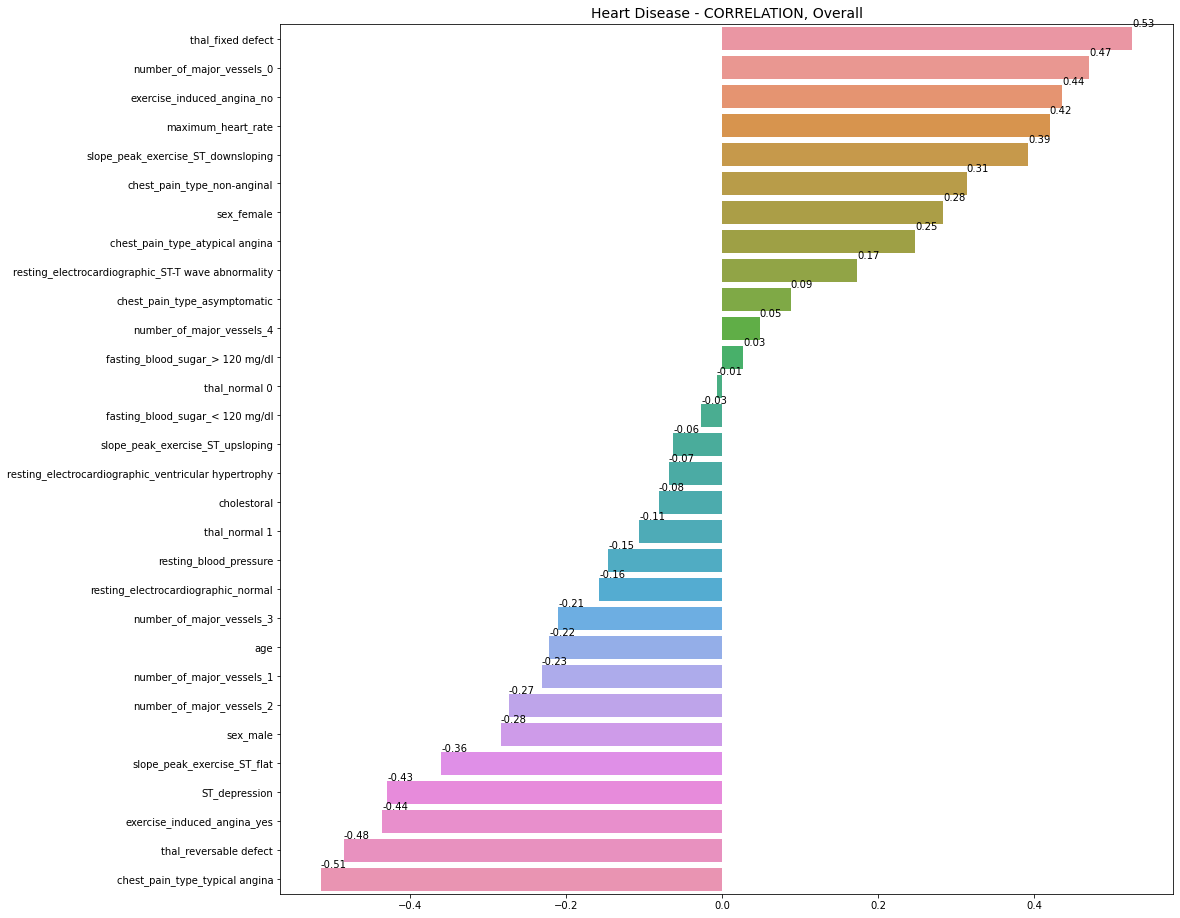

In [153]:
plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
    
plt.show()

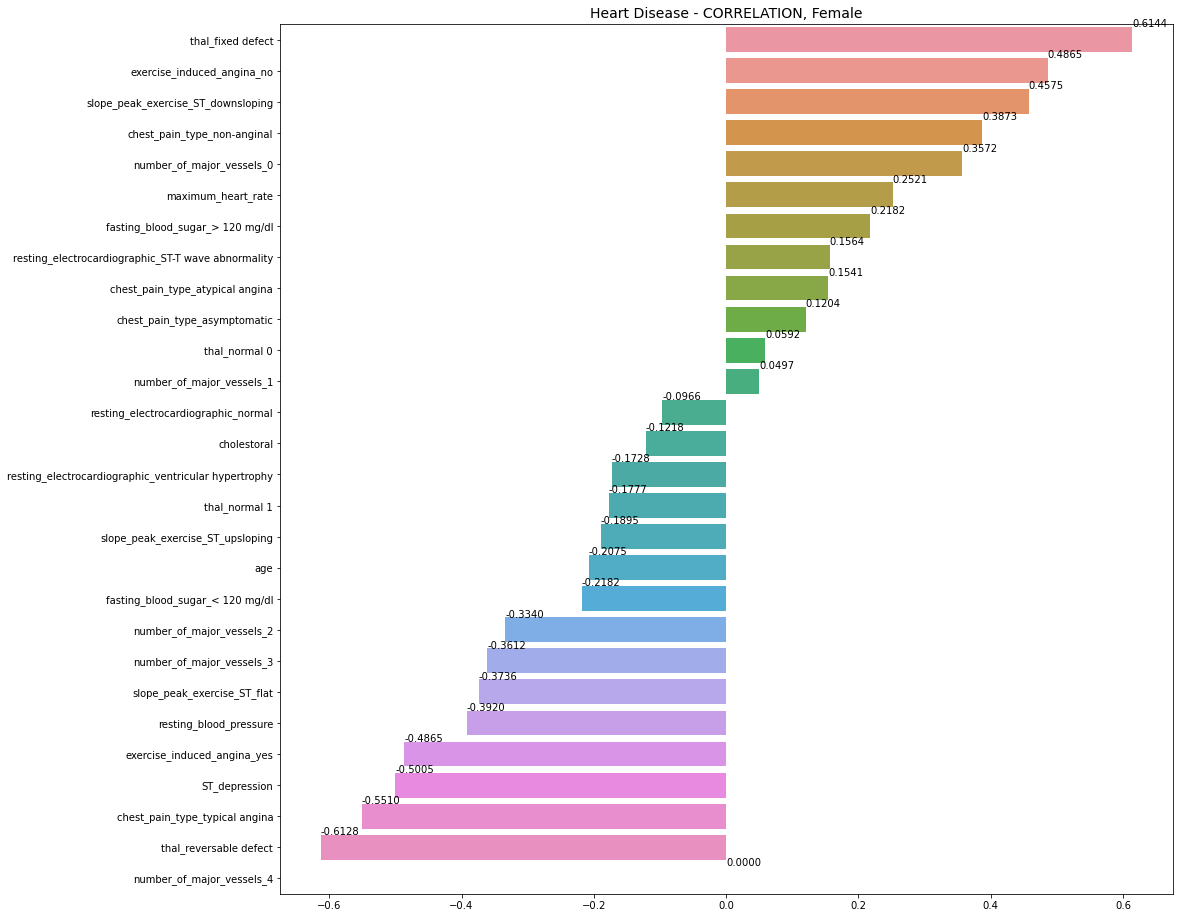

In [20]:
dataFemale = df[(df['sex_female'] == 1)]
dataFemaleCorr = dataFemale.drop(['sex_female','sex_male'], axis=1).corr()
dataFemaleCorr = dataFemaleCorr['target'].sort_values(ascending=False)
dataFemaleCorr['number_of_major_vessels_4'] = 0  # -7.9e-17  all numbers will be exp if not set to 0
dataFemaleCorr.to_frame()
dataFemaleCorr = dataFemaleCorr.drop(['target'])  # for barplot

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Female', fontsize=14)
ax = sns.barplot(y=dataFemaleCorr.index,x=dataFemaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

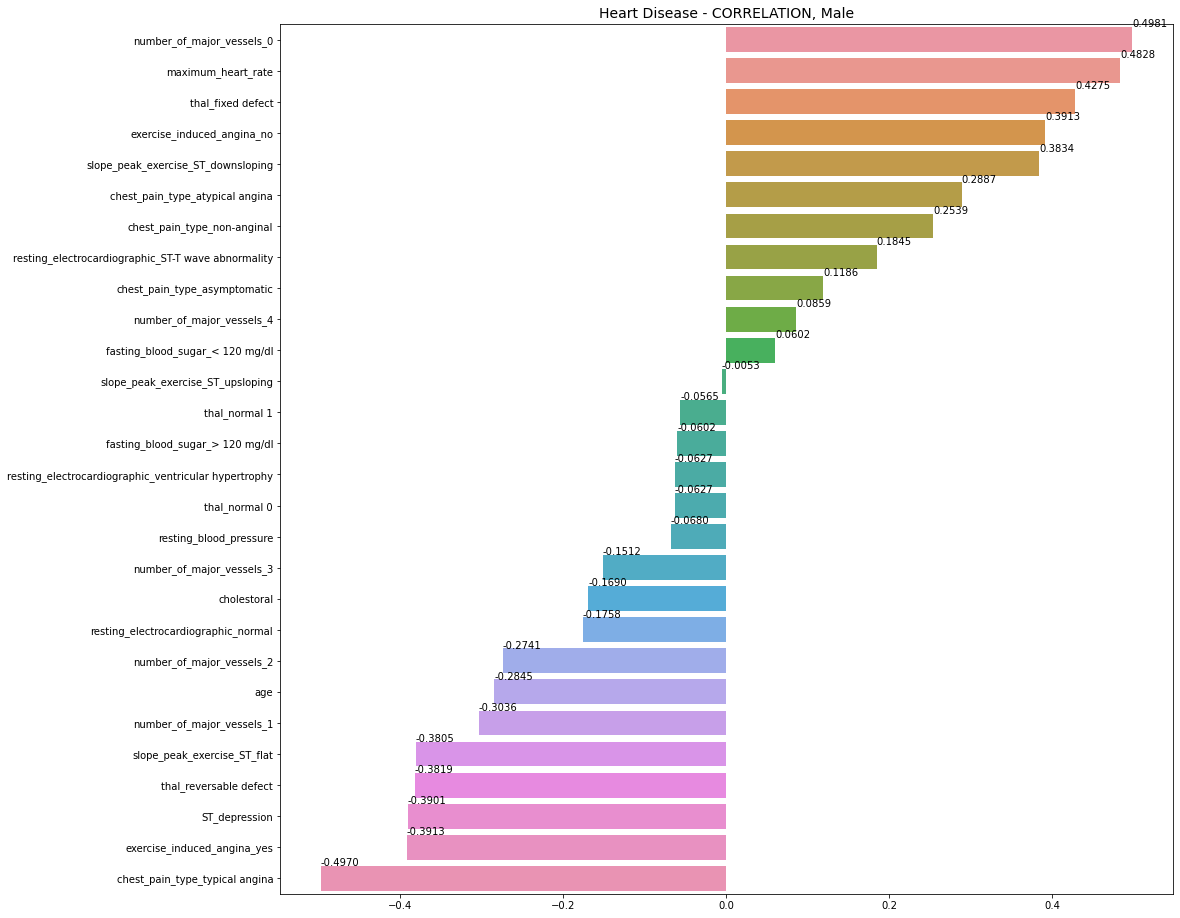

In [21]:
dataMale   = df[(df['sex_male'] == 1)]
dataMaleCorr = dataMale.drop(['sex_female','sex_male'], axis=1).corr()
dataMaleCorr = dataMaleCorr['target'].sort_values(ascending=False)
dataMaleCorr = dataMaleCorr.drop(['target'])

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Male', fontsize=14)
ax = sns.barplot(y=dataMaleCorr.index,x=dataMaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

In [219]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 30) (241,)
Test set:    (61, 30) (61,)


In [220]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [221]:
cross_val_score(LR,X,y,cv=5,scoring='accuracy').mean()

0.844153005464481

In [222]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LR, X_train, y_train, cv=10, scoring='accuracy'))
print('Cross Validation Score (mean):  {:3.4%}'.format(cross_val_score(LR, X_train, y_train, cv=10, scoring='accuracy').mean()))

[0.68       0.79166667 0.70833333 1.         0.91666667 0.83333333
 0.79166667 0.79166667 0.83333333 0.95833333]
Cross Validation Score (mean):  83.0500%


In [223]:
y_predict = LR.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score

print(' Testing Accuracy Score:  {:3.4%}'.format(accuracy_score(y_test,y_predict)))

 Testing Accuracy Score:  85.2459%


In [225]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_predict)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  87.6712%


In [197]:
y_test[:10],y_predict[:10]

(296    0
 170    0
 18     1
 43     1
 246    0
 196    0
 287    0
 185    0
 13     1
 237    0
 Name: target, dtype: int64,
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64))

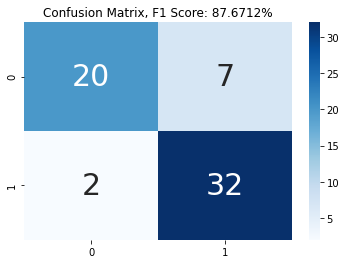

True Positive:	20
True Negative:	7
False Positive:	2
False Negative:	32


In [226]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix, annot=True,cmap='Blues',annot_kws={"size": 30})
plt.title("Confusion Matrix, F1 Score: {:3.4%}".format(f1score))
plt.show()

print('True Positive:\t{}'.format(conf_matrix[0,0]))
print('True Negative:\t{}'.format(conf_matrix[0,1]))
print('False Positive:\t{}'.format(conf_matrix[1,0]))
print('False Negative:\t{}'.format(conf_matrix[1,1]))

In [189]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict ,target_names=['no-disease','diseases']))

              precision    recall  f1-score   support

  no-disease       0.95      0.74      0.83        27
    diseases       0.82      0.97      0.89        34

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



In [169]:
report=classification_report(y_test,y_predict,target_names=['healthy','infected'],output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()


In [170]:
df_classification_report.reindex(['healthy', 'infected', 'accuracy', 'macro avg','weighted avg'])

,precision,recall,f1-score,support
healthy,0.952381,0.740741,0.833333,27.000000
infected,0.825000,0.970588,0.891892,34.000000
accuracy,0.868852,0.868852,0.868852,0.868852
macro avg,0.888690,0.855664,0.862613,61.000000
weighted avg,0.881382,0.868852,0.865973,61.000000
